<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/Largest_box_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
!pip install ortools
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt # Data visualization
import random
import numpy as np
import matplotlib.patches as patches
KOLORS= ['#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39',
    '#e7ba52', '#e7cb94', '#843c39', '#ad494a', '#d6616b', '#e7969c', '#7b4173', '#a55194', '#ce6dbd', '#de9ed6',
    '#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2', '#31a354', '#74c476',
    '#a1d99b', '#c7e9c0', '#756bb1', '#9e9ac8', '#bcbddc', '#dadaeb', '#636363', '#969696', '#bdbdbd', '#d9d9d9',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252', '#b5cf6b', '#cedb9c'
]

In [127]:
df= pd.DataFrame()
N = 500
amax = 1000
nodes = range(N)
df['X'] = [random.randint(0,amax) for n in nodes]
df['Y'] = [random.randint(0,amax) for n in nodes]
df['v'] = [random.randint(-int(amax),amax) for n in nodes]

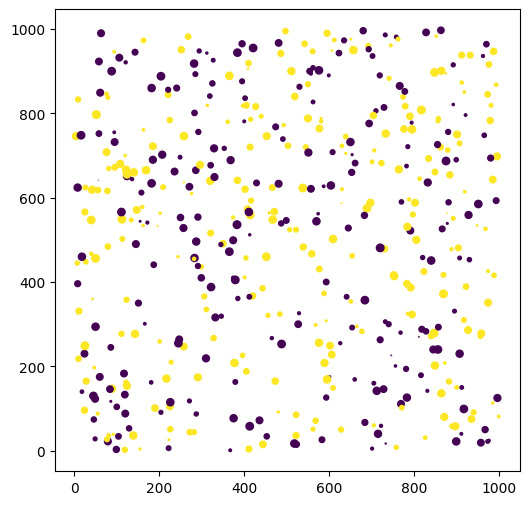

In [128]:
plt.figure(figsize=(6,6))

X = df['X']
Y = df['Y']
plt.scatter(X,Y, c=df['v']>1, s=abs(0.03*df['v']) )
n,m = 2,2

In [140]:
df.head()

,X,Y,v
0,60,175,-739
1,282,918,-884
2,588,373,327
3,158,612,-376
4,507,524,252


from matplotlib import pyplot as plt
_df_0['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['v'].plot(kind='hist', bins=20, title='v')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Y', y='v', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['v'].plot(kind='line', figsize=(8, 4), title='v')
plt.gca().spines[['top', 'right']].set_visible(False)

In [138]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()

xu = model.NewIntVar(0,amax,f"xu")
yu = model.NewIntVar(0,amax,f"yu")
xd = model.NewIntVar(0,amax,f"xd")
yd = model.NewIntVar(0,amax,f"yd")

xli = {i:model.NewBoolVar(f"xli_{i}") for i in nodes}
xri = {i:model.NewBoolVar(f"xri_{i}") for i in nodes}
yui = {i:model.NewBoolVar(f"yui_{i}") for i in nodes}
ydi = {i:model.NewBoolVar(f"ydi_{i}") for i in nodes}

point_inside = {i:model.NewBoolVar(f"pin_{i}") for i in nodes}
model.Add(xd<xu)
model.Add(yd<yu)

model.Add(xu-xd<=150)
model.Add(yu-yd<=150)

for i in nodes:
  model.Add(int(df.loc[i,'X'])<=xu).OnlyEnforceIf(xli[i])
  model.Add(int(df.loc[i,'X'])>xu).OnlyEnforceIf(xli[i].Not())
  model.Add(int(df.loc[i,'X'])>=xd).OnlyEnforceIf(xri[i])
  model.Add(int(df.loc[i,'X'])<xd).OnlyEnforceIf(xri[i].Not())
  model.Add(int(df.loc[i,'Y'])<=yu).OnlyEnforceIf(ydi[i])
  model.Add(int(df.loc[i,'Y'])>yu).OnlyEnforceIf(ydi[i].Not())
  model.Add(int(df.loc[i,'Y'])>=yd).OnlyEnforceIf(yui[i])
  model.Add(int(df.loc[i,'Y'])<yd).OnlyEnforceIf(yui[i].Not())

  model.Add(point_inside[i]<=xli[i])
  model.Add(point_inside[i]<=xri[i])
  model.Add(point_inside[i]<=yui[i])
  model.Add(point_inside[i]<=ydi[i])
  model.Add(point_inside[i]>=xli[i]+xri[i]+yui[i]+ydi[i]-3)


expressions = [int(df.loc[i,'v'])*point_inside[i] for i in nodes ]
model.Maximize(sum(expressions))
solver.Solve(model)

solver.objective_value


8697.0

19 534 169 680


(8697.0, 4339)

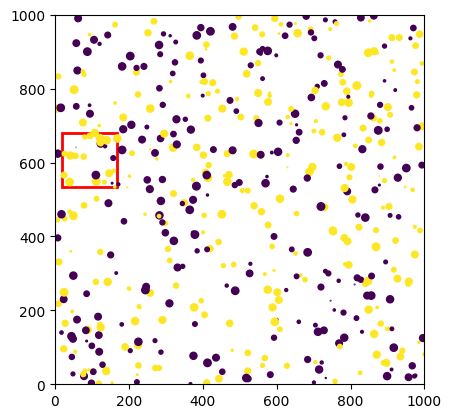

In [139]:
fig, ax = plt.subplots()
x1,y1, x2,y2 = solver.Value(xd), solver.Value(yd), solver.Value(xu), solver.Value(yu)
print(x1,y1,x2,y2)
rect_n = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect_n)
xm,ym = 0.5*(x1+x2), 0.5*(y1+y2)
plt.scatter(X,Y, c=df['v']>1, s=abs(0.03*df['v']) )
ax.set_xlim([0, amax])
ax.set_ylim([0, amax])
ax.set_aspect('equal')
solver.ObjectiveValue(), df['v'].sum()
